# UTSA CS 3793/5233: Assignment-4

Fall 2020


Mauch - Nathan - nja859






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network (Optional - Extra Credit)


## Description

The goal of the assignment is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification and Natural Language Processing.

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [1]:
# import all required libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load/Prepare Data

(5 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training. 
*   Visualize the data by plotting 100 random images, one each for the 100 classes




In [2]:
# Load the data - training as well as testing
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Prepare the data that can be used by the next step - creating and training the DL model
x_train, x_test = x_train / 255.0, x_test / 255.0

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



(50000, 32, 32, 3)
(10000, 32, 32, 3)
100


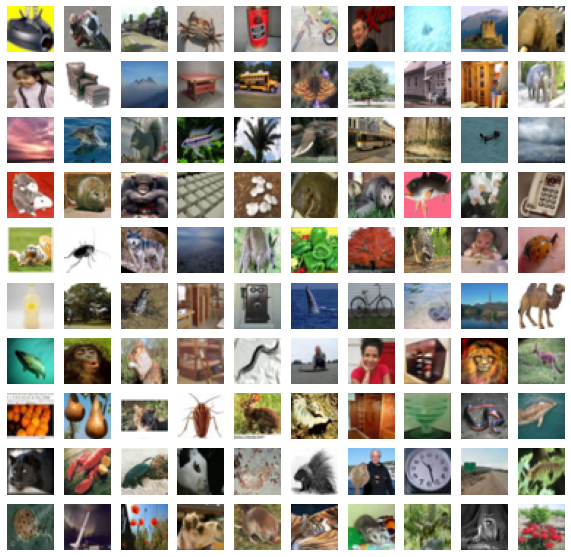

In [3]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
fig, axes1 = plt.subplots(10,10,figsize=(10,10))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(x_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x_train[i:i+1][0])
print(x_train.shape)
print(x_test.shape)
print(len(np.unique(y_train)))

# CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary


**NOTE** 
You can use, as examples, any different training model that you can find online. However, you cannot call any already created model. You have to create (write) it yourself. But, you can use those models online as examples for coding yours. Please, make sure that you cite correctly if you used any of them.

In [9]:
def create_model():
    model = keras.Sequential([
                                keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                                                    input_shape=(x_train.shape[1], x_train.shape[2], 3)),
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Flatten(),
                                keras.layers.Dense(100, activation='relu'),
                                keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
                                ])
    model.compile(
        optimizer='SGD',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
        )
    return model

cifar_model = create_model()

In [10]:
# Print the DL model summary
print(cifar_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               230500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

# Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [11]:
# Train/fit the DL model using the training CIFAR-100 data
history = cifar_model.fit(x_train, y_train, epochs=20, batch_size=50, verbose=1)


Epoch 1/20
1000/1000 [==============================] - 73s 73ms/step - loss: 4.5617 - accuracy: 0.0210
Epoch 2/20
1000/1000 [==============================] - 71s 71ms/step - loss: 4.2528 - accuracy: 0.0553
Epoch 3/20
1000/1000 [==============================] - 71s 71ms/step - loss: 3.9931 - accuracy: 0.0935
Epoch 4/20
1000/1000 [==============================] - 71s 71ms/step - loss: 3.8042 - accuracy: 0.1272
Epoch 5/20
1000/1000 [==============================] - 72s 72ms/step - loss: 3.6466 - accuracy: 0.1568
Epoch 6/20
1000/1000 [==============================] - 71s 71ms/step - loss: 3.5026 - accuracy: 0.1839
Epoch 7/20
1000/1000 [==============================] - 72s 72ms/step - loss: 3.3731 - accuracy: 0.2054
Epoch 8/20
1000/1000 [==============================] - 71s 71ms/step - loss: 3.2575 - accuracy: 0.2260
Epoch 9/20
1000/1000 [==============================] - 73s 73ms/step - loss: 3.1562 - accuracy: 0.2466
Epoch 10/20
1000/1000 [==============================] - 71s 71m

Test loss: 2.433943748474121 / Test accuracy: 0.38944000005722046


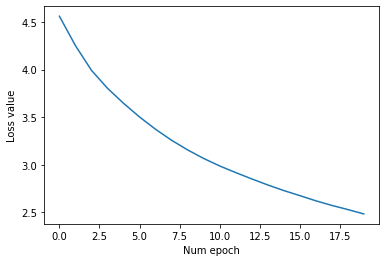

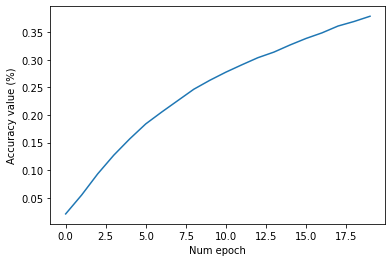

In [13]:
# Plot the training/validation accuracy and loss
score = cifar_model.evaluate(x_train, y_train, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

plt.plot(history.history['loss'])
plt.ylabel('Loss value')
plt.xlabel('Num epoch')
plt.show()


plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy value (%)')
plt.xlabel('Num epoch')
plt.show()


In [20]:
# Save the trained model weights in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase
cifar_model.save_weights("/content/drive/My Drive/Colab Notebooks/cifar/")


# Testing/Evaluation

(10 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model. 

In [21]:
# Re-initialize the model
cifar_model = create_model()


In [22]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
cifar_model.load_weights('/content/drive/My Drive/Colab Notebooks/cifar/')


In [23]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
cifar_model.evaluate(x_test, y_test, batch_size=1)


10000/10000 [==============================] - 20s 2ms/step - loss: 4.6124 - accuracy: 0.0107


[4.612401008605957, 0.010700000450015068]

# Model Performance - Accuracy

(5 points)

For the models submitted, we will look at the accuracy values on the test data. Credit will be allocated based on how the performance is for your model. The submission with the highest accuracy value will get the highest credit and the one with the lowest accuracy value will get the lowest credit.

# Extra Credit Task - NLP / RNN

The extra credit task is very similar to the required task above. The only change is that the task is not from Computer Vision domain and instead it is from the Natural Language Processing domain. Almost all of the code above can be copied and used in this task. 

## Description

The goal of the extra credit task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(5 points)

In this section, you will write code for the following: 

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word



In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words



## RNN Model Creation

(7.5 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU



In [ ]:
# Print the DL model summary



## Training

(7.5 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
# Train/fit the DL model using the training Reuters data



In [ ]:
# Plot the training/validation accuracy and loss



In [ ]:
# Save the trained model weights in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/", to be used for the testing phase



## Testing/Evaluation

(5 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model.

In [ ]:
# Re-initialize the model



In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"



In [ ]:
# Evaluate the trained DL model on the Reuters test dataset



# Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folder "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) 
4.   If submitting the extra credit work for the NLP task, also download and zip the folder "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip) 
5.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   (5 points) Load/Prepare Data
*   (15 points) CNN Model Creation
*   (15 points) Training
*   (10 points) Testing/Evaluation
*   (5 points) Model Performance - Accuracy
*   (25 points) Extra Credit Task - NLP / RNN

